In [1]:
import rawpy
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import importlib
import find_stars
importlib.reload(find_stars)
from find_stars import StarFinder

Scan stars from image

In [3]:
out_of_focus = r"C:\code\astrocam\outoffocus\Image741.nef"
in_focus = r"C:\code\astrocam\light\Image752.nef"

s = StarFinder()

ref_data = s.getStarData(in_focus)
tgt_data = s.getStarData(out_of_focus)
ref_image, ref_stars = ref_data["image"], ref_data["stars"]
tgt_image, tgt_stars = tgt_data["image"], tgt_data["stars"]


Convert to DataFrame

In [4]:
def getStarDF(stardata):
  df = pd.DataFrame(stardata)
  df.drop(0, axis=0, inplace=True)
  return df


In [5]:
df_ref = getStarDF(ref_stars)

In [6]:
df_tgt = getStarDF(tgt_stars)

In [7]:
df_ref

,area,centroid,box,tile_4,tile_16,tile_32
1,43,"[560.8372093023256, 1.9069767441860466]","[556, 0, 566, 5]",140,35,18
2,88,"[2968.9204545454545, 180.60227272727272]","[2964, 175, 2974, 186]",49252,3156,903
3,70,"[2920.4, 182.1]","[2916, 177, 2925, 187]",50318,3153,901
4,206,"[2233.9854368932038, 241.9126213592233]","[2226, 233, 2242, 251]",65238,4190,1150
5,49,"[679.0, 495.0]","[675, 491, 683, 499]",133842,8412,2046
6,151,"[1154.4370860927152, 579.5165562913908]","[1148, 572, 1161, 587]",156599,9792,2466
7,49,"[2172.0, 793.0]","[2168, 789, 2176, 797]",213987,13636,3443
8,56,"[1510.0, 864.5]","[1506, 860, 1514, 869]",233226,14674,3692
9,177,"[1913.9943502824858, 933.6836158192091]","[1907, 926, 1921, 942]",251652,15780,3975
10,63,"[2265.5555555555557, 951.4444444444445]","[2261, 947, 2270, 956]",257130,16072,4121


Make triangles with stars as vertices
- For each triangle, store the ratio of two shorter sides to the longest side as fX & fY

In [8]:
from itertools import combinations, product
import math

def getTriangles(df):

    # Cache distances between every pair of stars
    starDistances = {}
    for c in combinations(df.index, 2):
        assert(c[1] > c[0])
        key = (c[0], c[1])
        x1, y1 = df.loc[c[0]].centroid
        x2, y2 = df.loc[c[1]].centroid
        starDistances[key] = math.sqrt((x2-x1)**2 + (y2-y1)**2)

    vTriangles = []
    for i,j,k in combinations(df.index, 3):
        vDistances = sorted([starDistances[(i,j)], starDistances[(j,k)], starDistances[(i,k)]])

        if vDistances[2] > 0:
            fX = vDistances[1]/vDistances[2]
            fY = vDistances[0]/vDistances[2]

            # Filter
            if (fX < 0.9):
                # Add to the triangle list
                vTriangles.append({"s1":i, "s2":j, "s3":k, "fX":fX, "fY":fY})

    vTriangles = sorted(vTriangles, key=lambda x: x["fX"])
    return pd.DataFrame(vTriangles)


In [9]:
tri_ref = getTriangles(df_ref)
print(len(tri_ref))

5993


In [10]:
tri_tgt = getTriangles(df_tgt)
print(len(tri_tgt))

7386


Collect triangle match counts

In [11]:
TRIANGLETOLERANCE = 1e-4
votes = np.zeros((len(df_ref)+1, len(df_tgt)+1), dtype=np.uint32)

for tgt in tri_tgt.itertuples():
    ref_matches = tri_ref[(tri_ref.fX >= tgt.fX) & (tri_ref.fX <= tgt.fX + TRIANGLETOLERANCE)]
    ref_matches = ref_matches[(ref_matches.fX-tgt.fX)**2 + (ref_matches.fY-tgt.fY)**2 < TRIANGLETOLERANCE**2]
    for ref in ref_matches.itertuples():
        for a,b in product([ref.s1, ref.s2, ref.s3], [tgt.s1, tgt.s2, tgt.s3]):
            votes[int(a), b] += 1

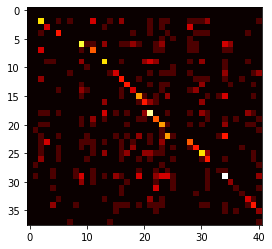

In [12]:
plt.imshow(votes, cmap='hot')
plt.show()

Produce sorted list of star pairs with highest votes

In [13]:
vVotingPairs = np.column_stack(np.unravel_index(np.argsort(votes, axis=None), shape=votes.shape))[::-1]

In [14]:
len(vVotingPairs)

1558

Select only those votes that are higher than a treshold

In [15]:
x,y = vVotingPairs[len(df_tgt)]
cutoff = max(1, votes[x,y])
print(f"Vote cutoff threshold: {cutoff}")
topVotePairs = list(filter(lambda r: votes[r[0],r[1]] > cutoff, vVotingPairs))

Vote cutoff threshold: 2


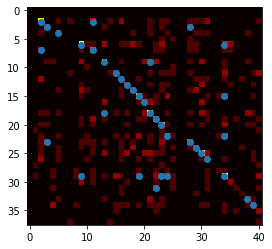

In [16]:
plt.imshow(votes, cmap='hot')
plt.scatter([x[1] for x in topVotePairs], [x[0] for x in topVotePairs])
plt.show()

In [17]:
len(topVotePairs)

37

Plot star match results

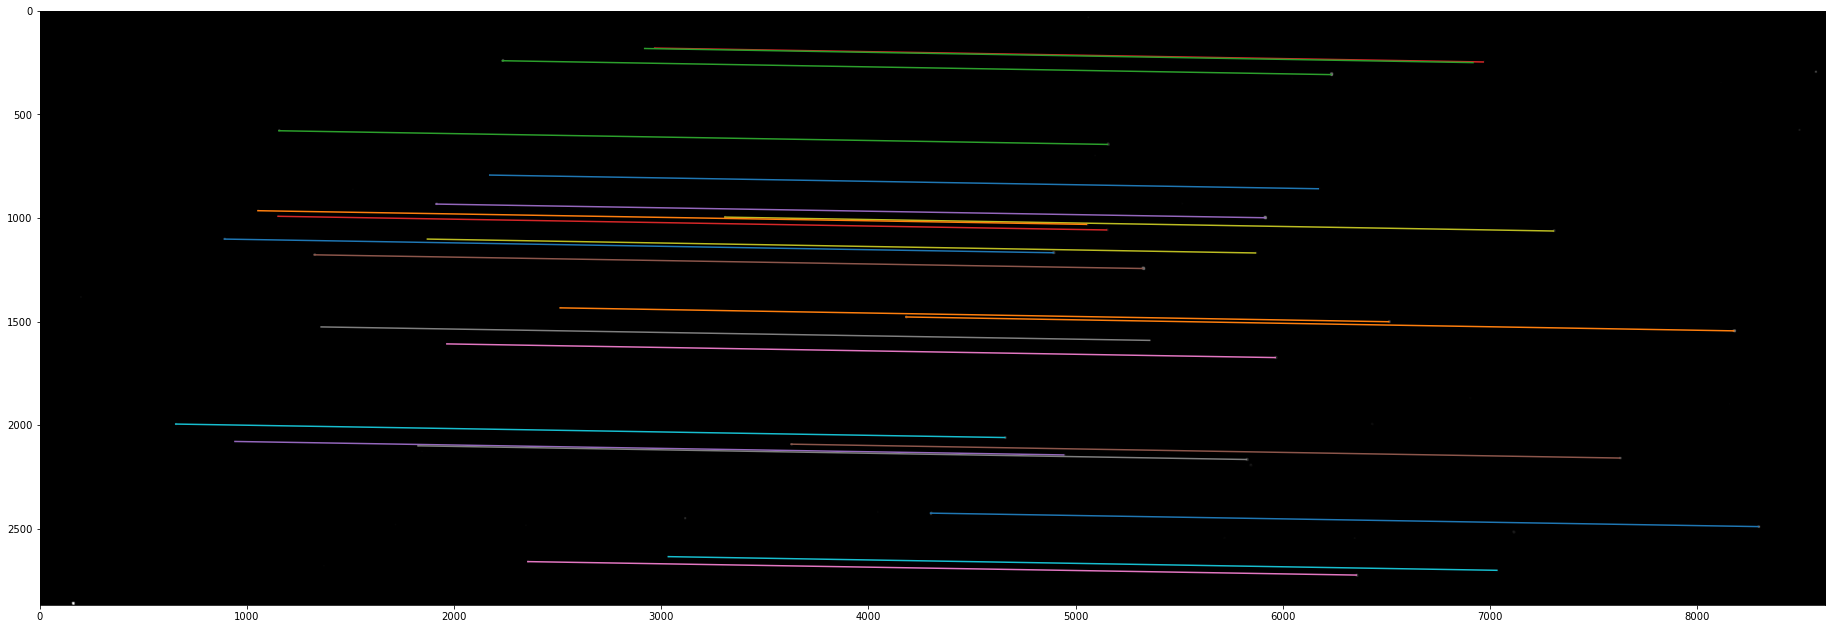

In [18]:
img = np.column_stack((ref_image,tgt_image))
fig = plt.figure(figsize=(32,16))
plt.imshow(img, cmap='gray')

for vp in topVotePairs:
    s1, s2 = vp
    if s1 == 0 or s2 == 0:
        continue

    if np.argmax(votes[:, s2]) != s1 or np.argmax(votes[s1, :]) != s2:
        continue

    x1,y1 = df_ref.loc[s1].centroid
    x2,y2 = df_tgt.loc[s2].centroid
    x2 += ref_image.shape[1]
    xs = [int(x1), int(x2)]
    ys = [int(y1), int(y2)]
    plt.plot(xs, ys)

plt.show()